# Ecuaciones de Euler de la rotación | Volante de inercia

[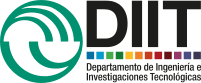](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
El volante de inercia de la figura tiene una masa de $10\,\mathrm{kg}$ es solidario al eje de masa despreciable sostenido por los cojinetes $A$ y $B$.
Este eje gira con velocidad angular constante.
El cojinete $A$ es de empuje, por lo que provee reacción también en la dirección longitudinal al eje en tanto que el $B$ solo lo hace en las direcciones transversales.
Un eje transversal al del volante sostiene la montura del cojinete $A$ y también gira con velocidad angular constante.
1. Determine las reacciones que deben proveer los cojinetes.
    
![](https://github.com/bettachini/UNLaM_MecanicaGeneral/blob/master/10Rotaci%C3%B3nEuler/figuras/hibb21_6.png?raw=1)

## Planteo
Las vectores de velocidad angular pasan por el punto $A$ por lo que restaría obtener los $I$ y los $\vec{\tau}$ referidos a tal punto para poder escribir las ecuaciones de Euler para la rotación.

$$
\left\{
\begin{aligned}
(I_y - I_z) \Omega_y \Omega_z - I_x \frac{d \Omega_x}{d t} + \tau_x &= 0\\
(I_z - I_x) \Omega_z \Omega_x - I_y \frac{d \Omega_y}{d t} + \tau_y &= 0\\
(I_x - I_y) \Omega_x \Omega_y - I_z \frac{d \Omega_z}{d t} + \tau_z &= 0
\end{aligned}
\right.
$$
Se alinean ejes pasando por $A$ con $\hat{z}$ en la dirección del eje sobre el que rota el disco.
Las fuerzas de reacción $A_x$, $B_x$ y $A_z$ se calcularan respetando el sentido positivo de tal eje, con signo opuesto a los dibujados.

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
# las ecuaciones de Euler para la rotación
t = sym.symbols('t')
I_x, I_y, I_z = sym.symbols('I_x I_y I_z', positive=True)
tau_x, tau_y, tau_z = sym.symbols('tau_x tau_y tau_z') 
omega_x = sym.Function('Omega_x')(t)
omega_y = sym.Function('Omega_y')(t)
omega_z = sym.Function('Omega_z')(t)

x_EL = sym.Eq( (I_y - I_z)* omega_y* omega_z - I_x* (omega_x.diff(t) ) + tau_x, 0)
y_EL = sym.Eq( (I_z - I_x)* omega_z* omega_x - I_y* (omega_y.diff(t) ) + tau_y, 0 )
z_EL = sym.Eq((I_x - I_y)* omega_x* omega_y - I_z* (omega_z.diff(t) ) + tau_z, 0 )

In [3]:
x_EL, y_EL, z_EL

In [4]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N')

# Parametros del sistema
g, m, R, d_AG, d_GB = sym.symbols('g m R d_{AG} d_{GB}')
omega_p, omega_s = sym.symbols('omega_p, omega_s')

# Fuerzas de reacción de los cojinetes
Ax, Ay, Az, Bx, By = sym.symbols('A_x A_y A_z B_x B_y')
F_A = Ax* N.x + Ay* N.y + Az* N.z
F_B = Bx* N.x + By* N.y

# Peso
F_G = m* (-g * N.y)

In [5]:
# velocidades angulares
omega_A = sym.Eq( sym.Symbol(r'\vec{\Omega}_A') , sym.Matrix( [0, omega_p, omega_s] ) , evaluate=False)
omega_A

                 ⎡0 ⎤
                 ⎢  ⎥
\vec{\Omega}_A = ⎢ωₚ⎥
                 ⎢  ⎥
                 ⎣ωₛ⎦

In [6]:
# torques desde A
r_AG = d_AG* N.z
tau_AG = r_AG.cross(F_G)
r_BA = r_AG + d_GB* N.z
tau_AB = r_BA.cross(F_B)
tau_A =  sym.Eq(sym.Symbol(r'\vec{\tau}_A'), (tau_AG + tau_AB).to_matrix(N), evaluate=False)
tau_A

               ⎡-B_y⋅(d_{AG} + d_{GB}) + d_{AG}⋅g⋅m⎤
               ⎢                                   ⎥
\vec{\tau}_A = ⎢       Bₓ⋅(d_{AG} + d_{GB})        ⎥
               ⎢                                   ⎥
               ⎣                 0                 ⎦

## Ecuaciones de Euler con los datos del problema

In [18]:
taus_omegas = {
    tau_x : tau_A.rhs[0],
    tau_y : tau_A.rhs[1],
    tau_z : tau_A.rhs[2],
    omega_x : omega_A.rhs[0],
    omega_y : omega_A.rhs[1],
    omega_z : omega_A.rhs[2],    
}
x_EL = x_EL.subs(taus_omegas).simplify()
y_EL = y_EL.subs(taus_omegas).simplify()
z_EL = z_EL.subs(taus_omegas).simplify()
sistema_EL = x_EL, y_EL, z_EL
sistema_EL

(-B_y⋅(d_{AG} + d_{GB}) + d_{AG}⋅g⋅m + ωₚ⋅ωₛ⋅(I_y - I_z) = 0, Bₓ⋅(d_{AG} + d_{GB}) = 0, True)

La última relación, la de z_EL, figura como `True` pues se trata de `0 = 0`. No puede dudarse de que efectivamente es cierto, pero no confiere ninguna información útil.

## Ecuaciones de la 2.a ley de Newton

In [20]:
# F = m* a
x_Newton = sym.Eq( (F_A+ F_B+ F_G).dot(N.x) , 0 )
y_Newton = sym.Eq( (F_A+ F_B+ F_G).dot(N.y) , 0 )
z_Newton = sym.Eq( (F_A+ F_B+ F_G).dot(N.z) , 0 )
sistema_Newton = x_Newton, y_Newton, z_Newton
sistema_Newton

## Resolución del sistema de ecuaciones

In [21]:
variablesDespeje = [Ax, Ay, Az, Bx, By]
sistemaEcuaciones = sistema_EL + sistema_Newton

In [22]:
variblesDespeje_sol = sym.nonlinsolve(sistemaEcuaciones, variablesDespeje ).args[0]
sym.Eq(sym.Matrix(variablesDespeje), sym.Matrix(variblesDespeje_sol) )

        ⎡                 0                 ⎤
        ⎢                                   ⎥
⎡Aₓ ⎤   ⎢-I_y⋅ωₚ⋅ωₛ + I_z⋅ωₚ⋅ωₛ + d_{GB}⋅g⋅m⎥
⎢   ⎥   ⎢───────────────────────────────────⎥
⎢A_y⎥   ⎢          d_{AG} + d_{GB}          ⎥
⎢   ⎥   ⎢                                   ⎥
⎢A_z⎥ = ⎢                 0                 ⎥
⎢   ⎥   ⎢                                   ⎥
⎢Bₓ ⎥   ⎢                 0                 ⎥
⎢   ⎥   ⎢                                   ⎥
⎣B_y⎦   ⎢I_y⋅ωₚ⋅ωₛ - I_z⋅ωₚ⋅ωₛ + d_{AG}⋅g⋅m ⎥
        ⎢────────────────────────────────── ⎥
        ⎣         d_{AG} + d_{GB}           ⎦

## Tensor de inercia

El momento de inercia en la dirección de $\hat{z}$ tiene $i=z$ e $k=z$
$$
I_{zz} 
= \iiint \tilde{\rho}(\vec{r}) \left(x^2 + y^2 + z^2 - zz \right) dV = \tilde{\rho} \iiint \left(\rho^2 \right) dV
$$
ya que la densidad es homogénea.

In [11]:
rho, z, varphi = sym.symbols('\rho z varphi')
jacobianoCilindricas = rho
volumen = sym.integrate(jacobianoCilindricas, (rho, 0,R), (varphi, 0, 2* sym.pi))
densidad = m/(volumen)

integrando = rho**2
I_zz_magnitud = sym.integrate(densidad* integrando* jacobianoCilindricas, (rho, 0, R), (varphi,0,2*sym.pi))
I_zz = sym.Eq( sym.Symbol('I_{zz}') , I_zz_magnitud)
I_zz

Como el disco se considera plano $I_{zz} = I_{xx} + I_{yy}$ y por la simetría $I_{xx}= I_{yy} = \frac{I_{zz}}{2}$.

In [12]:
I_xx = sym.Eq( sym.Symbol('I_{xx}') , I_zz.rhs/2)
I_yy = sym.Eq( sym.Symbol('I_{yy}') , I_zz.rhs/2)
I_xx, I_yy

Con Steiner los trasladamos al punto $A$.
El vector que va desde el punto de cálculo al centro de masa es $\vec{a} = d_{AG} \hat{z}$.

In [13]:
# momentos de inercia desde el punto A
I_A_zz = I_zz.rhs
I_A_xx = I_xx.rhs + m* d_AG**2
I_A_yy = I_yy.rhs + m* d_AG**2
I_A =  sym.Eq( sym.symbols('\overline{\overline{I}}_A') ,
              sym.Matrix( [ [I_A_xx,0,0], [0,I_A_yy,0], [0,0,I_A_zz] ] ) , evaluate= False)
I_A

                            ⎡ 2                                      ⎤
                            ⎢R ⋅m         2                          ⎥
                            ⎢──── + d_{AG} ⋅m         0           0  ⎥
                            ⎢ 4                                      ⎥
                            ⎢                                        ⎥
                            ⎢                   2                    ⎥
                            ⎢                  R ⋅m         2        ⎥
\overline{\overline{I}}_A = ⎢       0          ──── + d_{AG} ⋅m   0  ⎥
                            ⎢                   4                    ⎥
                            ⎢                                        ⎥
                            ⎢                                     2  ⎥
                            ⎢                                    R ⋅m⎥
                            ⎢       0                 0          ────⎥
                            ⎣                                     2  ⎦

## Magnitudes numéricas 

In [14]:
g_magnitud = 9.81 # [m s-2]
m_magnitud = 10 # [kg]
R_magnitud = 0.2 # [m] radio disco
d_AG_magnitud = 0.5 # [m]
d_GB_magnitud = 0.5 # [m]
omega_p_magnitud = 3.0 # [rad s-1]
omega_s_magnitud = 6.0 # [rad s-1]

parámetros = {
    I_x : I_A.rhs[0,0],
    I_y : I_A.rhs[1,1],
    I_z : I_A.rhs[2,2],
    omega_p : omega_p_magnitud,
    omega_s : omega_s_magnitud,
    g : g_magnitud,
    m : m_magnitud,
    R : R_magnitud,
    d_AG: d_AG_magnitud,
    d_GB : d_GB_magnitud,
}

In [16]:
variblesDespeje_numerico = variblesDespeje_sol.subs(parámetros)
sym.Eq(sym.Matrix(variablesDespeje), sym.Matrix(variblesDespeje_numerico) )

⎡Aₓ ⎤   ⎡       0        ⎤
⎢   ⎥   ⎢                ⎥
⎢A_y⎥   ⎢5.85000000000001⎥
⎢   ⎥   ⎢                ⎥
⎢A_z⎥ = ⎢       0        ⎥
⎢   ⎥   ⎢                ⎥
⎢Bₓ ⎥   ⎢       0        ⎥
⎢   ⎥   ⎢                ⎥
⎣B_y⎦   ⎣     92.25      ⎦